# Metropolis-Hastings Algorithm

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import beta

### Flipping a Fair Coin 

We assume that we flip a coin $N$ times and observe that $n$ of these are heads.

In [3]:
N = 6
n = 2

We have the same likelihood function as before, $P(n|p,N)$.

In [4]:
def likelihood(n, p, N):
    return np.math.factorial(N) / np.math.factorial(n) / np.math.factorial(N-n) * np.power(p, n) * np.power(1.0 - p, N-n)

We can now implement the Metropolis-Hastings algorithm.

In [5]:
trace = []

NUMBER_OF_SAMPLES = 100000

SAMPLE_STD = 0.1

p = 0.5

while len(trace) < NUMBER_OF_SAMPLES:
    
    p_candidate = np.maximum(0.0, np.minimum(1.0, p + SAMPLE_STD * np.random.normal()))
    
    alpha = likelihood(n, p_candidate, N) / likelihood(n, p, N)
    
    if np.random.random() < alpha:
        
        trace.append(p_candidate)
        
        p = p_candidate

We can then plot the trace.

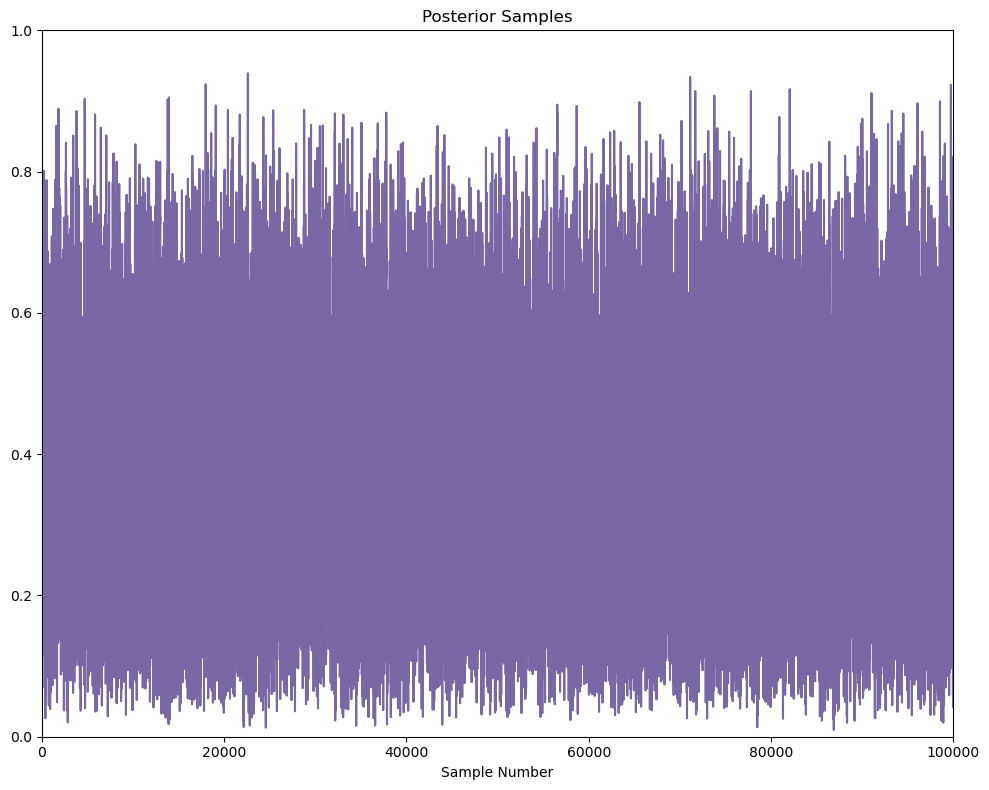

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(trace, color="#7A68A6")
plt.xlim(0, NUMBER_OF_SAMPLES)
plt.ylim(0, 1)
plt.title("Posterior Samples")
plt.xlabel("Sample Number")

plt.tight_layout()

We can also plot a histogram of the samples and ask matplotlib to generate a probability density.

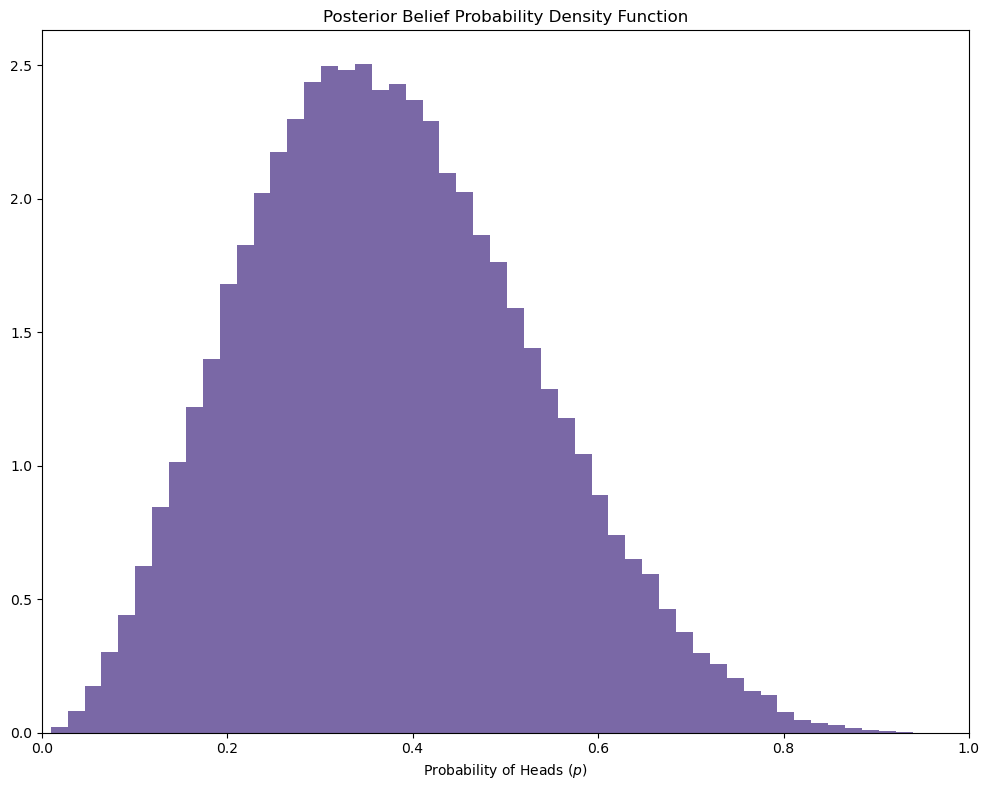

In [7]:
plt.figure(figsize=(10, 8))

plt.hist(trace, bins = 51, color="#7A68A6", density=True)
plt.xlim(0, 1)
plt.title("Posterior Belief Probability Density Function")
plt.xlabel("Probability of Heads ($p$)")

plt.tight_layout()

We can then compare this against the analytic solution calculated from the beta probability density function.

In [8]:
a = n + 1
b = N - n + 1

In [9]:
STEPS = 1001

p = np.linspace(0, 1, STEPS)

posterior = beta.pdf(p, a, b)

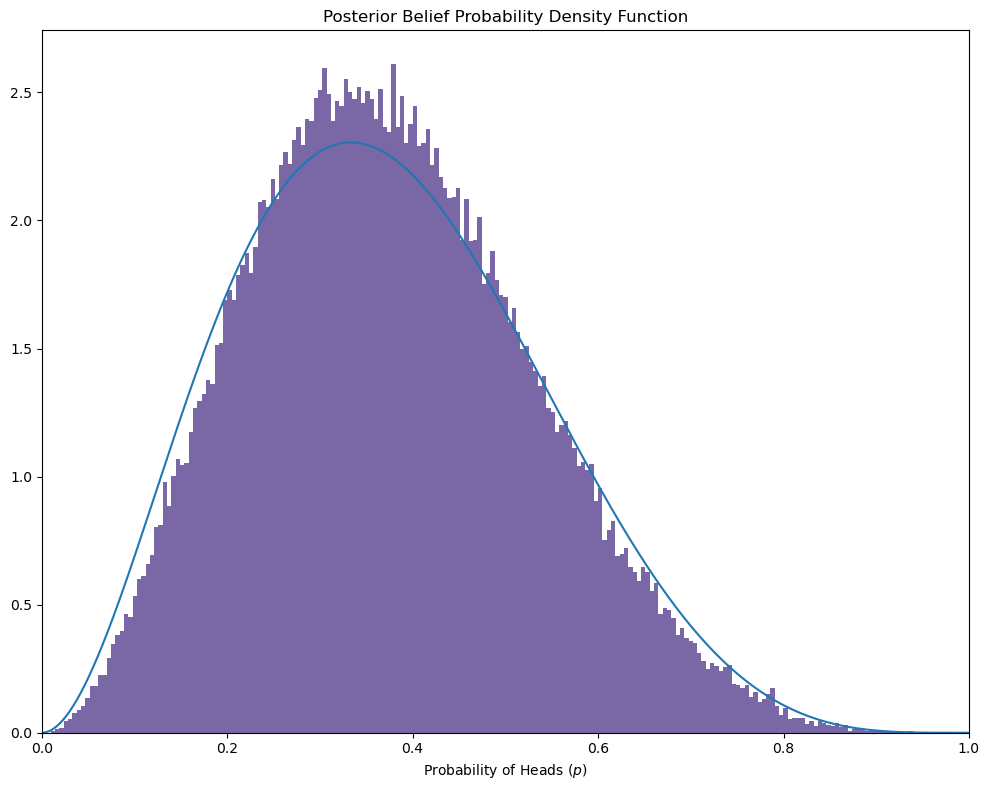

In [10]:
plt.figure(figsize=(10, 8))

plt.hist(trace, bins = 200, color="#7A68A6", density=True)
plt.plot(p, beta.pdf(p, a, b))
plt.xlim(0, 1)
plt.title("Posterior Belief Probability Density Function")
plt.xlabel("Probability of Heads ($p$)")

plt.tight_layout()